In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
sales= pd.read_csv("Advertising.csv")

In [4]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
sales.shape

(200, 5)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
sales[["TV","Radio"]]

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [9]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
#correlation
sales.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

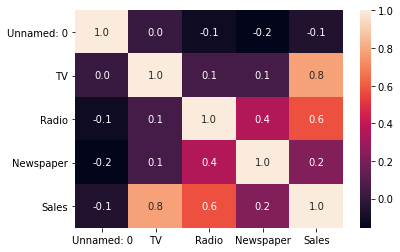

In [11]:
sns.heatmap(sales.corr(), annot=True, fmt=".1f")

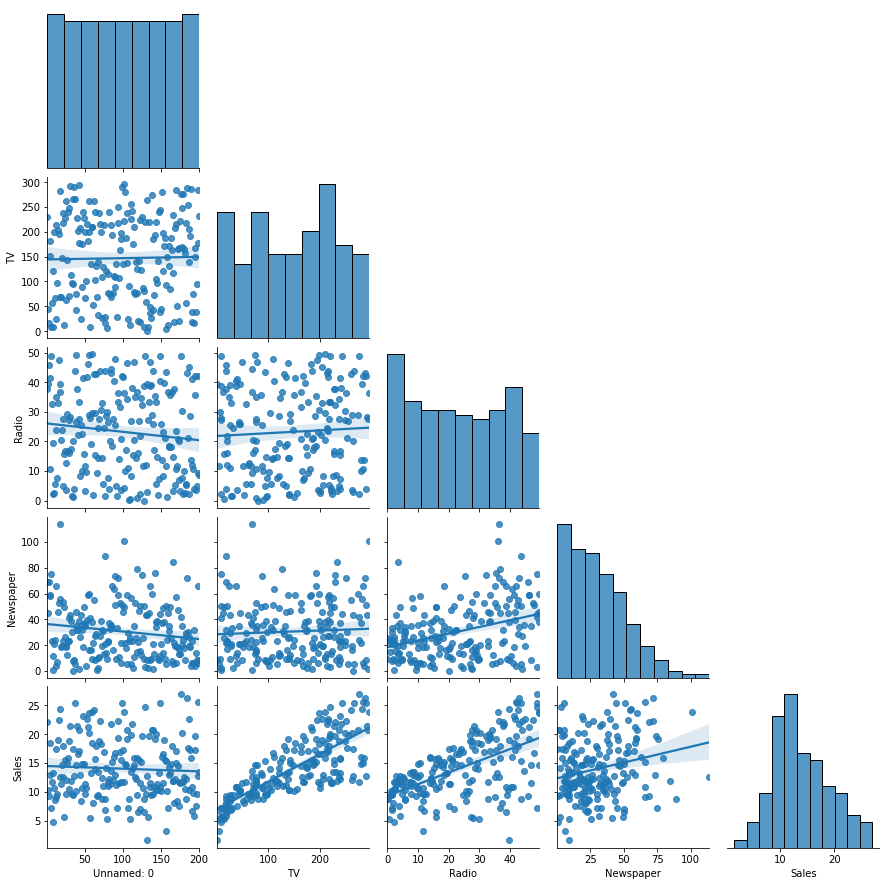

In [12]:
sns.pairplot(sales, kind="reg",corner=True);

In [13]:
#splitting data

X=sales.iloc[:,:-1]
y=sales.iloc[:,-1]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.1, random_state=24)


In [14]:
X_train.head()

,Unnamed: 0,TV,Radio,Newspaper
172,173,19.6,20.1,17.0
83,84,68.4,44.5,35.6
19,20,147.3,23.9,19.1
186,187,139.5,2.1,26.6
199,200,232.1,8.6,8.7


In [15]:
X_test.head()

,Unnamed: 0,TV,Radio,Newspaper
197,198,177.0,9.3,6.4
109,110,255.4,26.9,5.5
101,102,296.4,36.3,100.9
125,126,87.2,11.8,25.9
48,49,227.2,15.8,49.9


In [16]:
y_train.head()

172     7.6
83     13.6
19     14.6
186    10.3
199    13.4
Name: Sales, dtype: float64

In [17]:
y_test.head()

197    12.8
109    19.8
101    23.8
125    10.6
48     14.8
Name: Sales, dtype: float64

In [18]:
reg= LinearRegression()
reg.fit(X_train, y_train)
predict = reg.predict(X_test)


In [19]:
comp= pd.DataFrame({"y_test":list(y_test), "predict":list(predict)})
comp.head()

,y_test,predict
0,12.8,12.747425
1,19.8,19.823995
2,23.8,23.129800
3,10.6,9.051008
4,14.8,16.303329


In [20]:
score = metrics.r2_score(y_test, predict)


In [21]:
print("Score:{}".format(score*100))

Score:89.10556176937816
